In [5]:
from scipy import misc
from PIL import Image
from skimage import exposure
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import scipy
from math import sqrt,pi
from numpy import exp
import glob
import matplotlib.pyplot as pltss
from matplotlib import cm
import pandas as pd
from math import pi, sqrt
import pywt
import cv2
import numpy as np
import os
import csv
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import entropy as scipy_entropy
from numpy import unique

C:\Users\Ahsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


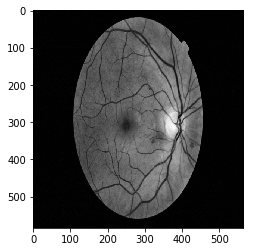

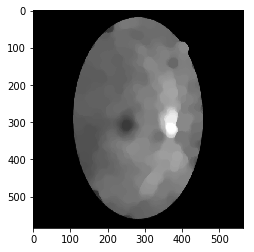

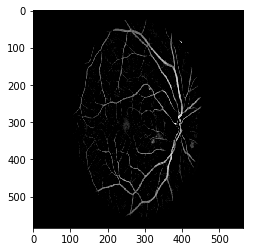

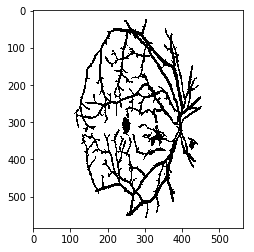

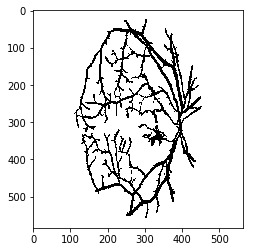

(100, 329960)

In [6]:
def clahe(image):
    b,green_fundus,r = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_enhanced_green_fundus = clahe.apply(green_fundus)
    return contrast_enhanced_green_fundus

def ASF(image):
    a=clahe(image)
    r1 = cv2.morphologyEx(a, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
    R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)	
    return R3

def substract(image):
    c=ASF(image)
    f4 = cv2.subtract(c,clahe(image))
    #f5 = clahe.apply(f4)
    return f4

def threshold(image):
    b,green_fundus,r = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    ff=substract(image)
    f5 = clahe.apply(ff)
    ret,f6 = cv2.threshold(f5,10,255,cv2.THRESH_BINARY)	
    mask = np.ones(f5.shape[:2], dtype="uint8") * 255	
    contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) <= 200:
            cv2.drawContours(mask, [cnt], -1, 0, -1)			
    im = cv2.bitwise_and(f5, f5, mask=mask)
    ret,fin = cv2.threshold(im,10,255,cv2.THRESH_BINARY_INV)			
    newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)
    return newfin
    

def extract_bv(image):
    
    thres=threshold(image)
    
    fundus_eroded = cv2.bitwise_not(thres)	
    xmask = np.ones(fundus.shape[:2], dtype="uint8") * 255
    xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)	
    for cnt in xcontours:
        shape = "unidentified"
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)   				
        if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
            shape = "circle"	
        else:
            shape = "veins"
        if(shape=="circle"):
            cv2.drawContours(xmask, [cnt], -1, 0, -1)	
    
    finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
    blood_vessels = cv2.bitwise_not(finimage)
    blood_vessels = blood_vessels
    return blood_vessels

#fig,ax

if __name__ == "__main__":
    immatrix=[]
    pathFolder = "F:\\-Thesis\\Data\\Base11"
    filesArray = [x for x in os.listdir(pathFolder) if os.path.isfile(os.path.join(pathFolder,x))]
    destinationFolder = "F:\\-Thesis\\Data\\Output\\"
    if not os.path.exists(destinationFolder):
        os.mkdir(destinationFolder)
    for file_name in filesArray:
        file_name_no_extension = os.path.splitext(file_name)[0]
        fundus = cv2.imread(pathFolder+'/'+file_name)
        fundus = misc.imresize(fundus, (584,565))
        bloodvessel = extract_bv(fundus)
        clah=clahe(fundus)
        asf=ASF(fundus)
        sub=substract(fundus)
        thresh=threshold(fundus)
        #img=mpimg.bloodvessel
        #cv2.imwrite(destinationFolder+file_name_no_extension+"_bloodvessel.png",bloodvessel)
        immatrix.append(np.array(bloodvessel).flatten())
    
    
    plt.imshow(clah,cmap="gray")
    plt.show()
    plt.imshow(asf,cmap="gray")
    plt.show()
    plt.imshow(sub,cmap="gray")
    plt.show()
    plt.imshow(thresh,cmap="gray")
    plt.show()
    plt.imshow(bloodvessel,cmap="gray")
    plt.show()
    

    
np.shape(immatrix)
np.shape(np.array(bloodvessel).flatten())

imm_new = []
for equ2 in immatrix:
    equ2 = equ2.reshape((584,565))
    imm_new.append(np.array(equ2).flatten())
np.shape(imm_new)




In [19]:
def shannon_entropy(image, base=2):
    counts = unique(image, return_counts=True)
    return scipy_entropy(counts, base=base)



IndexError: list index out of range

In [30]:
entropy = []
for i in range (0,100):
    entropy.append(shannon_entropy(imm_new[i]))
entropy

[array([0.        , 0.00984365]),
 array([0.        , 0.00979392]),
 array([0.        , 0.00984483]),
 array([0.        , 0.01007469]),
 array([0.        , 0.01001942]),
 array([0.        , 0.00972947]),
 array([0.       , 0.0097305]),
 array([0.        , 0.00997904]),
 array([0.        , 0.00990883]),
 array([0.        , 0.00990324]),
 array([0.        , 0.00977457]),
 array([0.        , 0.00970303]),
 array([0.        , 0.00979576]),
 array([0.        , 0.00978327]),
 array([0.        , 0.00992113]),
 array([0.        , 0.00984454]),
 array([0.        , 0.00982956]),
 array([0.        , 0.00944338]),
 array([0.        , 0.00978454]),
 array([0.       , 0.0097795]),
 array([0.        , 0.00989598]),
 array([0.        , 0.00989829]),
 array([0.        , 0.00987214]),
 array([0.        , 0.00978113]),
 array([0.        , 0.01008485]),
 array([0.        , 0.01007682]),
 array([0.        , 0.00975188]),
 array([0.        , 0.00990255]),
 array([0.        , 0.00984643]),
 array([0.        

In [39]:
imm_kmean = []
for equ2 in imm_new:
    img = equ2.reshape((584,565))
    b=np.zeros((584,2))
    img=np.hstack((img,b))
    
    Z = img.reshape((-1,3))

    Z = np.float32(Z)

    k=cv2.KMEANS_PP_CENTERS

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,k)

    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    imm_kmean.append(np.array(res2).flatten())


# split

In [40]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("F:\\-Thesis\\Data\\label.csv")
Y = df
#Y[Y < 4] = 0

print(Y)
x_train, x_test, y_train, y_test = train_test_split(imm_kmean, Y, test_size=0.2, random_state=10)

    1
0   0
1   0
2   0
3   1
4   0
5   0
6   0
7   1
8   1
9   1
10  1
11  1
12  1
13  1
14  1
15  1
16  1
17  1
18  1
19  1
20  1
21  1
22  1
23  1
24  1
25  1
26  0
27  0
28  0
29  0
.. ..
70  1
71  1
72  1
73  1
74  1
75  1
76  1
77  1
78  1
79  1
80  1
81  1
82  1
83  1
84  1
85  1
86  1
87  1
88  1
89  1
90  1
91  1
92  1
93  1
94  1
95  1
96  0
97  0
98  1
99  0

[100 rows x 1 columns]


# training svm

In [41]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

clf.fit(x_train, y_train)

C:\Users\Ahsan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

0.55

In [8]:
#clf.fit(imm_train, y_train)
#y_pred = clf.predict(imm_kmean)
#accuracy_score(Y,y_pred)

In [43]:
from sklearn.metrics import confusion_matrix
a=confusion_matrix(y_test,y_pred)

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
#neigh.score(imm_kmean,Y)
y_pred = neigh.predict(x_test)
a=confusion_matrix(y_test,y_pred)

print("Confusion Matrix for KNN\n")
print(a)
print()

tn = a[0][0]
fp = a[0][1]
fn = a[1][0]
tp = a[1][1]

total_cm_knn = tn+fp+fn+tp
#print(total_cm)

accuracy_knn = (tp+tn)/total_cm_knn
print("Accuracy KNN\n")
print(accuracy_knn)
print()

recall_knn = tp/(tp+fn)
print("Recall KNN\n")
print(recall_knn)
print()

precision_knn = tp/(tp+fp)
print("Precision KNN\n")
print(precision_knn)
print()


C:\Users\Ahsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix for KNN

[[ 0  9]
 [ 0 11]]

Accuracy KNN

0.55

Recall KNN

1.0

Precision KNN

0.55



# RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier
neigh = RandomForestClassifier()
neigh.fit(x_train, y_train)
#neigh.score(imm_kmean,Y)
y_pred = neigh.predict(x_test)
a=confusion_matrix(y_test,y_pred)

print("Confusion Matrix for RF\n")
print(a)
print()

tn = a[0][0]
fp = a[0][1]
fn = a[1][0]
tp = a[1][1]

total_cm_rm = tn+fp+fn+tp
#print(total_cm)

accuracy_rm = (tp+tn)/total_cm_rm
print("Accuracy RF\n")
print(accuracy_rm)
print()

recall_rm = tp/(tp+fn)
print("Recall RF\n")
print(recall_rm)
print()

precision_rm = tp/(tp+fp)
print("Precision RF\n")
print(precision_rm)
print()

C:\Users\Ahsan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix for RF

[[1 8]
 [6 5]]

Accuracy RF

0.3

Recall RF

0.45454545454545453

Precision RF

0.38461538461538464



# ADAPTIVE BOOST

In [46]:
from sklearn.ensemble import AdaBoostClassifier
neigh = AdaBoostClassifier(n_estimators=100, random_state=0)
neigh.fit(x_train, y_train)
#neigh.score(imm_kmean,Y)
y_pred = neigh.predict(x_test)
a=confusion_matrix(y_test,y_pred)

print("Confusion Matrix for Adaboost\n")
print(a)
print()

tn = a[0][0]
fp = a[0][1]
fn = a[1][0]
tp = a[1][1]

total_cm_ab = tn+fp+fn+tp
#print(total_cm)

accuracy_ab = (tp+tn)/total_cm_ab
print("Accuracy Adaboost\n")
print(accuracy_ab)
print()

recall_ab = tp/(tp+fn)
print("Recall Adaboost\n")
print(recall_ab)
print()

precision_ab = tp/(tp+fp)
print("Precision Adaboost\n")
print(precision_ab)
print()

C:\Users\Ahsan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix for Adaboost

[[2 7]
 [2 9]]

Accuracy Adaboost

0.55

Recall Adaboost

0.8181818181818182

Precision Adaboost

0.5625



# NAIVE BAYES

In [13]:
from sklearn.naive_bayes import GaussianNB
neigh = GaussianNB()
neigh.fit(x_train, y_train)
#neigh.score(imm_kmean,Y)
y_pred = neigh.predict(x_test)
a=confusion_matrix(y_test,y_pred)

print("Confusion Matrix for NB\n")
print(a)
print()

tn = a[0][0]
fp = a[0][1]
fn = a[1][0]
tp = a[1][1]

total_cm_nb = tn+fp+fn+tp
#print(total_cm)

accuracy_nb = (tp+tn)/total_cm_nb
print("Accuracy NB\n")
print(accuracy_nb)
print()

recall_nb = tp/(tp+fn)
print("Recall NB\n")
print(recall_nb)
print()

precision_nb = tp/(tp+fp)
print("Precision NB\n")
print(precision_nb)
print()


C:\Users\HP USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix for NB

[[ 8  1]
 [ 1 10]]

Accuracy NB

0.9

Recall NB

0.9090909090909091

Precision NB

0.9090909090909091



# logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x_train, y_train)

#neigh.score(imm_kmean,Y)
y_pred = clf.predict(x_test)

a=confusion_matrix(y_test,y_pred)


print("Confusion Matrix for Logistic Regression\n")
print(a)
print()

tn = a[0][0]
fp = a[0][1]
fn = a[1][0]
tp = a[1][1]

total_cm_lr = tn+fp+fn+tp
#print(total_cm)

accuracy_lr = (tp+tn)/total_cm_lr
print("Accuracy LR\n")
print(accuracy_lr)
print()

recall_lr = tp/(tp+fn)
print("Recall LR\n")
print(recall_lr)
print()

precision_lr = tp/(tp+fp)
print("Precision LR\n")
print(precision_lr)
print()




C:\Users\HP USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix for Logistic Regression

[[9 0]
 [2 9]]

Accuracy LR

0.9

Recall LR

0.8181818181818182

Precision LR

1.0



# Merging 1

# Ensemble

In [18]:
from sklearn.ensemble import RandomForestClassifier 
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

rf_3 = AdaBoostClassifier(n_estimators=200, random_state=0)

# set up RF_1 n_estimators=200 criterion='gini' 
rf_1 = RandomForestClassifier(n_estimators=200 ,criterion= 'gini')

# set up RF_2 n_estimators=200 criterion='entropy' 
rf_2 = KNeighborsClassifier(n_neighbors=3)

# set up ensemble of rf_1 and rf_2 
clf = EnsembleVoteClassifier(clfs=[rf_1, rf_2, rf_3], voting='hard', weights=[1,1,1])

# fit training data 
clf.fit(x_train, y_train)

# for this competition, we want probabilities instead of just binary (1/0) &nbsp; &nbsp; # predictions, so you use 'clf.predict_proba' instead of just 'clf.predict' 
y_pred = clf.predict(x_test)
a=confusion_matrix(y_test,y_pred)

print("Confusion Matrix for Adaboost\n")
print(a)
print()

tn = a[0][0]
fp = a[0][1]
fn = a[1][0]
tp = a[1][1]

total_cm_ab = tn+fp+fn+tp
#print(total_cm)

accuracy_ab = (tp+tn)/total_cm_ab
print("Accuracy Adaboost\n")
print(accuracy_ab)
print()

recall_ab = tp/(tp+fn)
print("Recall Adaboost\n")
print(recall_ab)
print()

precision_ab = tp/(tp+fp)
print("Precision Adaboost\n")
print(precision_ab)
print()

C:\Users\HP USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Confusion Matrix for Adaboost

[[9 0]
 [2 9]]

Accuracy Adaboost

0.9

Recall Adaboost

0.8181818181818182

Precision Adaboost

1.0

